## Census API 

This notebook uses API (Application programming interface) to accesss data from the Census Bureau. In many cases the API requires a key in order to fetch data. In the case of the Census API a key is only required for more then 500 calls per day. Therefore, we will not require getting an API key to run this notebook (yay!). 


This notebook provides access to specific data provided through the Census Bureau API. The code is written so that it enables flexiblity in the type of data, granularity, and period. The Census API includes many datasets and can be personalized in multiple ways.  



In [99]:
%matplotlib inline 
import requests
import pandas as pd
import json
import pickle
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
import geopandas as gpd
from variables import *

# Background/Introduction

For our group final, we focused our project on the American Community Survey 5-Year Data 2019 which was obtained from the Census API. We chose to focus on this data (with a concentration on the variables of income (USD), unemployment rate (percentage), median household income (USD), and gross rent (USD)) to create a new component that could enable the access of new data/the conduction of additional analysis on the collected data. More specifically, we focus on the San Francisco and New York City regions when looking at the link between income, unemployment, median household income, and gross rent . This work can add value to future users in regards to studies/research discussing the correlations between income, unemployment rates, median household income, and rent of all the states within the US as well as a pair of cities (San Francisco and New York City). 

# ACS 2019 data columns

Resources: 
- Census API page https://www.census.gov/data/developers/data-sets.html 
- Census API available datasets https://api.census.gov/data.html 


The code in the next section provides easy-to-use code snipts for accessing a pre-defined list variables based on topics. At this time race and age related variables are available. Note that these variables are being loaded from the variables.py script and are imported in the import line. 

#### Income (US dollar):
- Percent Under 10,000
- Percent 10,000 to 14,999
- Percent 15,000 to 24,999
- Percent 25,000 to 34,999
- Percent 35,000 to 49,999
- Percent 50,000 to 74,999
- Percent 75,000 to 99,999
- Percent 100,000 to 149,999
- Percent 150,000 to 199,999
- Percent 200,000 or more

#### Unemployment Rate (percentage)

#### Median household income (US dollar)

#### Gross Rent (US dollar)：
- Percent Under 500
- Percent 500 to 999
- Percent 1000 to 1499
- Percent 1500 to 1999
- Percent 2000 to 2499
- Percent 2500 to 2999
- Percent 3000 or more

### How does it work? 

Data for each one of these group categories can be accessed from the 5 years estimates ACS data using the code below. To download given data you will need to specify the parameters in one cell (see details below), and then run the remaining code for the section without making any futher changes. Running these cells will fetch the data, make some formating transformations, re-arrange the data, rename columns, create a map of the data, and eventually export the data as a csv file into your local machine.



In [100]:
# print list of variables
print('Income -->', INCOME)
INCOME_GROUPS.values()
GROSSRENT_GROUPS.values()

Income --> DP03_0076PE,DP03_0077PE,DP03_0078PE,DP03_0079PE,DP03_0080PE,DP03_0081PE,DP03_0082PE,DP03_0083PE,DP03_0084PE,DP03_0085PE


dict_values(['PercentLessThan500', 'Percent500to999', 'Percent1000to1499', 'Percent1500to1999', 'Percent2000to2499', 'Percent2500to2999', 'Percent3000ormore'])

# 1. Get data from API for ACS 5 years in State Level for 2019
## 1.1 Percentage of household within an income range
Choose your list of variables for the API call

In [101]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'
# this comes from the list of variables 
columns = INCOME 

In [102]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=state:*'
#data_url

In [103]:
#retrieve the data
response=requests.get(data_url)
#print(response.text)

These results come in text form. We will transform them into json as an intermidiate step before turning them 
to a data frame 
### Transform API results into DataFrame

In [104]:
#make dataframe:

#1. turn response into json
popdata=response.json()
popdata 

# transforminto a DF

df=pd.DataFrame(popdata[1:], columns=popdata[0])

df.head()

DP03_0076PE DP03_0077PE DP03_0078PE DP03_0079PE DP03_0080PE DP03_0081PE  \
0         5.0         3.1         8.2         9.2        12.8        19.1   
1         2.8         1.6         4.2         5.4         8.8        16.9   
2         4.2         2.4         6.6         8.2        12.6        19.3   
3         4.5         3.3         8.9        10.4        14.5        20.0   
4         3.3         2.2         6.1         6.8        10.1        15.4   

  DP03_0082PE DP03_0083PE DP03_0084PE DP03_0085PE state  
0        14.3        16.4         6.3         5.6    01  
1        14.3        23.0        12.1        10.8    02  
2        14.5        17.3         7.3         7.5    04  
3        13.8        14.8         5.1         4.8    05  
4        12.9        18.3        10.3        14.5    06

### Change column names using a dictionary 

Column names by default are generated from the API call as the variable codes. Which for the human eye are useless strings! That's where the .py script comes into play again. INCOME is a dictionary that is used to inidcate which string belongs to which category. The result is a DataFrame that includes column names that are convinient for the human eye. 

In [105]:
dfstate = df.rename(columns = INCOME_GROUPS)
dfstate.dtypes

PercentUnder$10,000          object
Percent$10,000to$14,999      object
Percent$15,000to$24,999      object
Percent$25,000to$34,999      object
Percent$35,000to$49,999      object
Percent$50,000to$74,999      object
Percent$75,000to$99,999      object
Percent$100,000to$149,999    object
Percent$150,000to$199,999    object
Percent$200,000ormore        object
state                        object
dtype: object

### Export as csv, Name and save Data Frame as CSV 

In [106]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today+'IncomeByStates' 
dfstate.to_csv(home+'.csv', sep=',')

## Plotting - Percentage of household within given income ranges

STATEFP   STATENS     AFFGEOID GEOID STUSPS                          NAME  \
0      12  00294478  0400000US12    12     FL                       Florida   
1      78  01802710  0400000US78    78     VI  United States Virgin Islands   
2      30  00767982  0400000US30    30     MT                       Montana   
3      27  00662849  0400000US27    27     MN                     Minnesota   
4      24  01714934  0400000US24    24     MD                      Maryland   

  LSAD         ALAND       AWATER  \
0   00  138947364717  31362872853   
1   00     348021896   1550236199   
2   00  376966832749   3869031338   
3   00  206230065476  18942261495   
4   00   25151726296   6979340970   

                                            geometry  
0  MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...  
1  MULTIPOLYGON (((-64.62799 17.78933, -64.62717 ...  
2  POLYGON ((-116.04914 48.50205, -116.04913 48.5...  
3  MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ...  
4  MULTIPOLYGON (((-76.05015 37.98691, -76.04998 ...

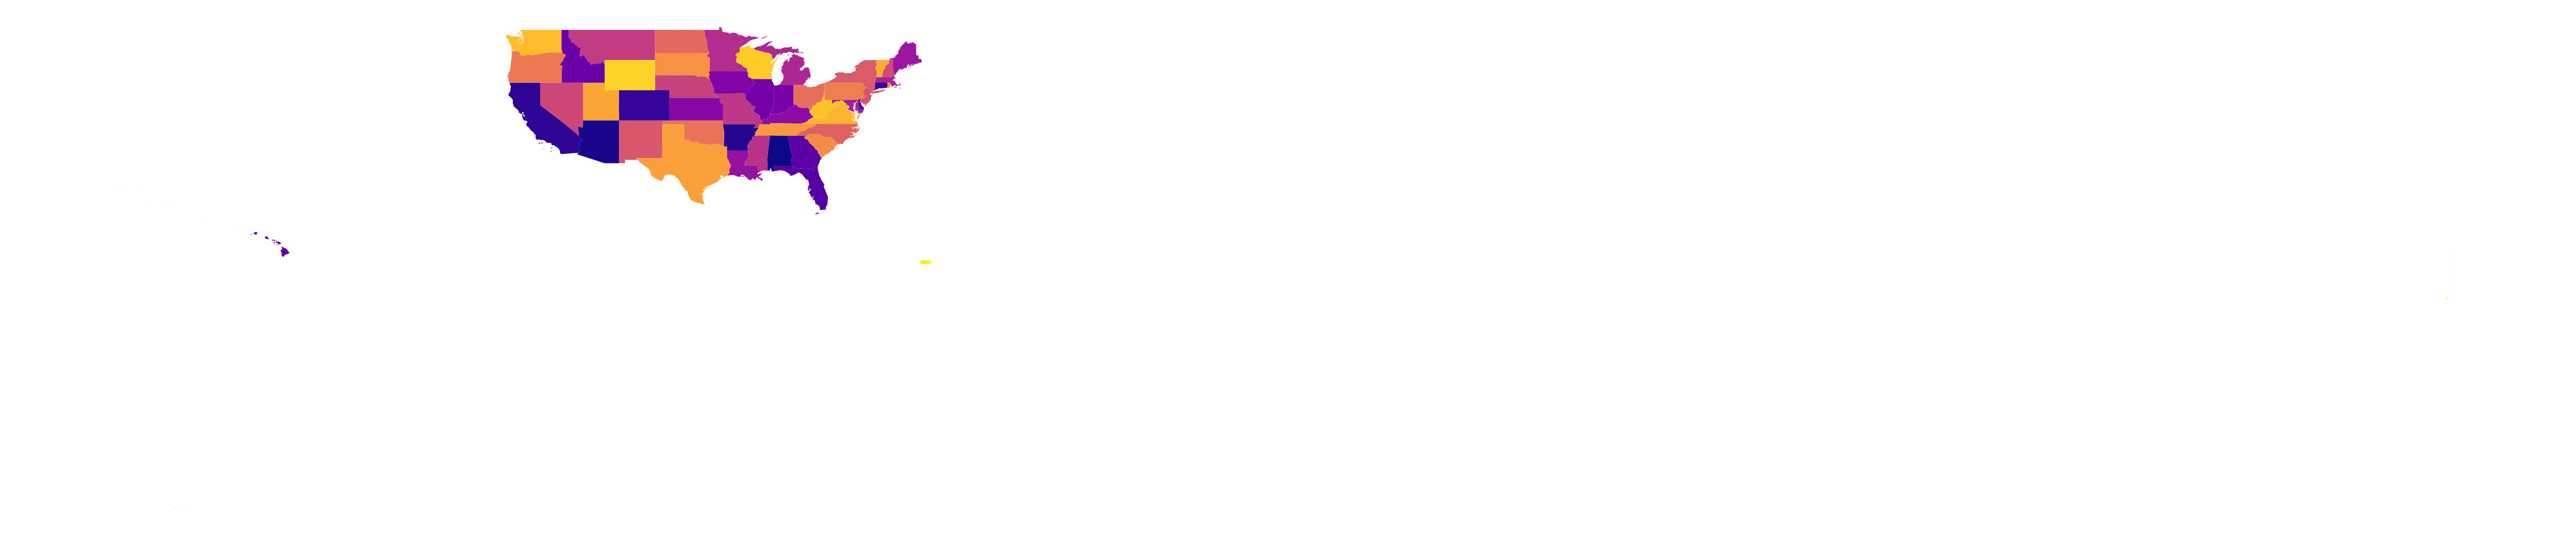

In [107]:
state = gpd.read_file('2019UsState')

# we drop the Alaska state since it makes the map pretty small
new_state = state[state['STATEFP'] != "02"]
new_state.plot(column='STATEFP', cmap ='plasma', figsize=(100,100))
plt.axis('off')
new_state.head()

The map above is an overview of the US states map.

### Merge State Shapefile with ACS API Results and plot

In [108]:
#merge inner all NYC States and the API results
usplot = new_state.merge(dfstate, left_on='STATEFP', right_on='state')

### Function that takes in an income-range column name and plot the graph

In [109]:
# Function for plotting 
def plotUSIncome(column_name):
    plt.figure(figsize=(10,20))

    # set the range for the choropleth
    vmin, vmax = 1.9,21.5

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 20))

    # remove the axis
    ax.axis('off')

    # add a title and annotatio"
    ax.set_title("Percent of Households that have income {col} by state in US\n\n".format(col = column_name[7:]), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm.set_array([])

    # add the colorbar to the figure
    fig.colorbar(sm, shrink=0.2 )

    #fig.set_size_inches(18.5, 18.5, forward=True)

    # plot the map
    usplot.plot(column= column_name, cmap='Purples', linewidth=0.2, ax=ax, edgecolor='0.8')

### 1.1.1 Plot of household income under $10,000

<Figure size 720x1440 with 0 Axes>

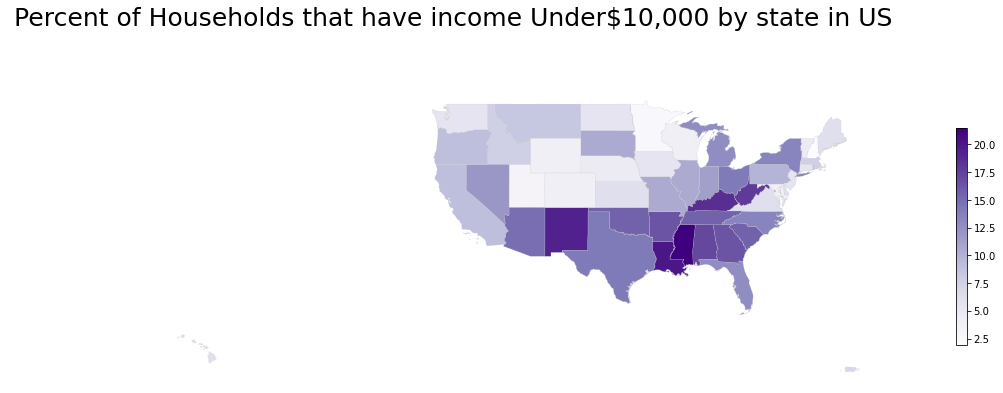

In [110]:
plotUSIncome('PercentUnder$10,000')

In the graphs above and below, we can see the percentage of households that are within a given income range throughout the US. 

This map shows the percentage of households per state that have an income that is under $10,000 within the US. Majority of the households that have an income under 10,000 within the US are located towards the southern (southeast and southwest) states.   

### 1.1.2 Plot of household income over $200,000

<Figure size 720x1440 with 0 Axes>

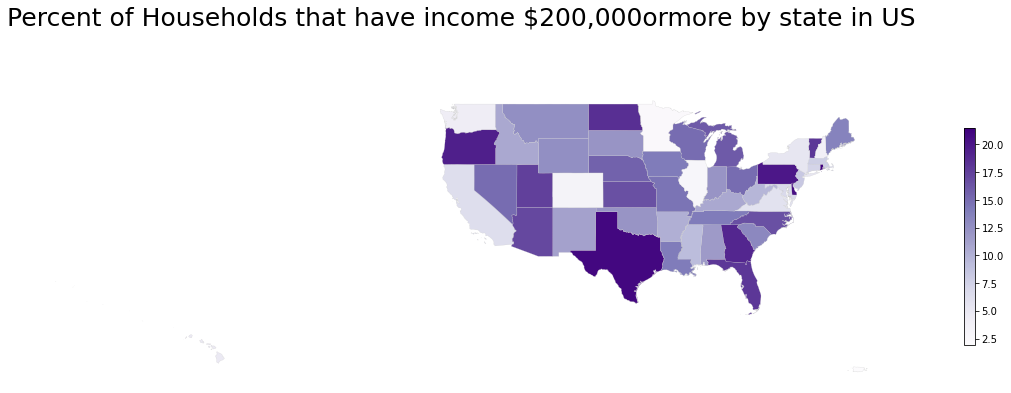

In [111]:
plotUSIncome('Percent$200,000ormore')

This map shows the percentage of households within each state that has an income of $20,000 or more within the US. The states that have the higher percent of households with an income of 200,000 or more includes Oregon, Texas, North Dakota, Georgia, Florida, Pennsylvania, Delaware, Rhode Island, and Vermont. 

In [112]:
# Plot the percentage in bar graph
# First we need to change the string to float for summing up the percentage
state_income_sum = dfstate.astype(float)

# get the sum and average it by the states number
state_income_sum = state_income_sum.drop(['state'],axis=1).sum(axis = 0, skipna = True)/len(state_income_sum.index)

#convert to dataframe
state_income_sum_df = pd.DataFrame(state_income_sum)

state_income_sum_df.rename(columns={0:'Percentage'})

Percentage
PercentUnder$10,000          3.942308
Percent$10,000to$14,999      2.403846
Percent$15,000to$24,999      6.234615
Percent$25,000to$34,999      7.484615
Percent$35,000to$49,999     11.359615
Percent$50,000to$74,999     17.836538
Percent$75,000to$99,999     14.798077
Percent$100,000to$149,999   18.655769
Percent$150,000to$199,999    8.303846
Percent$200,000ormore        8.992308

### 1.1.3 Plot of all state avergae income distribution

Text(0.5, 1.0, 'Average percentage of households income distribution of all US stats')

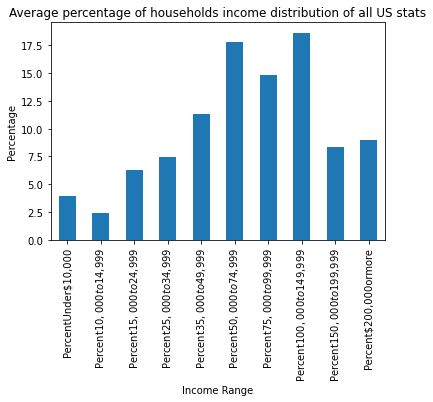

In [113]:
state_income_sum_df.plot.bar(label = "Income Range", legend = False)
plt.ylabel("Percentage")
plt.xlabel("Income Range")
plt.title("Average percentage of households income distribution of all US stats")

This graph shows the percentage of households throughout all of the US states that fall into the given income ranges. As seen above, a large percentage of households within the US fall in the income ranges of [Percent $ 50,000-$ 74,999],[Percent $ 75,000-$ 99,999), and [Percent $ 100,000-$ 199,999].

## Save data as ShapeFile

In [114]:
usplot.to_file('IncomeState.shp')

<ipython-input-114-8a475e155662>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  usplot.to_file('IncomeState.shp')


## 1.2 Median Household Income by US state

In [115]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'

# this comes from the list of variables 
columns = MEDIANINCOME 

In [116]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'

#now set the the data url
data_url = f'{acs_url}?get={columns}&for=state:*'

In [117]:
#retrieve the data
median_response=requests.get(data_url)

These results come in text form. We will transform them into json as an intermediate step before turning them 
to a data frame.
### Transform API results into DataFrame

In [118]:
#make dataframe:

#1. turn response into json
median_data=median_response.json()
median_data 

# transforminto a DF

df_median=pd.DataFrame(median_data[1:], columns=median_data[0])

df_median.head()

DP03_0062E state
0      50536    01
1      77640    02
2      58945    04
3      47597    05
4      75235    06

### Change column names using a dictionary 

In [119]:
df_median = df_median.rename(columns = MEDIANINCOME_GROUPS)
df_median['Median household income'].min()
df_median['Median household income'].max()

'86420'

### Export as csv, Name and save Data Frame as CSV 

In [120]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today +'MedianHouseholdIncome'
df_median.to_csv(home+'.csv', sep=',')

## Plotting - Median Household Income
### 1.2.1 Plot median household income by state

In [121]:
#merge inner all NYC States and the API results
median_plot = new_state.merge(df_median, left_on='STATEFP', right_on='state')

<AxesSubplot:title={'center':'Median Household income by state in US\n\n'}>

<Figure size 720x1440 with 0 Axes>

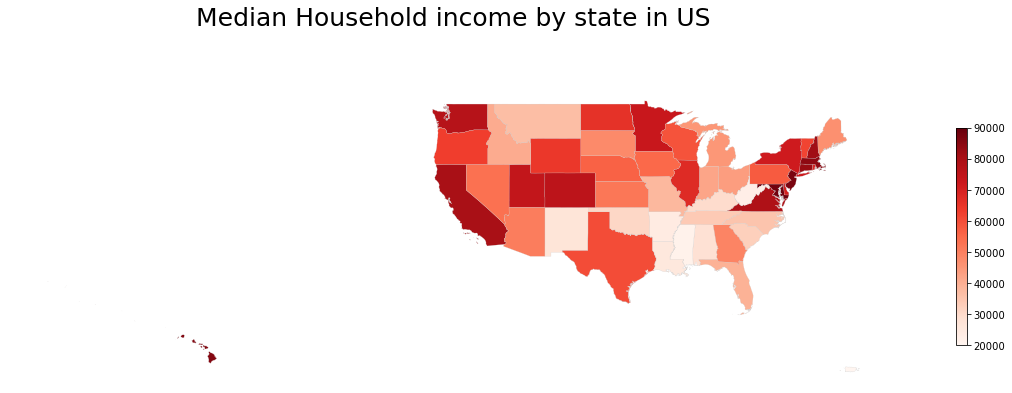

In [122]:
# Function for plotting 

plt.figure(figsize=(10,20))

# set the range for the choropleth
vmin, vmax = 20000,90000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 20))

# remove the axis
ax.axis('off')

# add a title and annotatio"
ax.set_title("Median Household income by state in US\n\n", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm, shrink=0.2)

# plot the map
median_plot.plot(column= 'Median household income', cmap='Reds', linewidth=0.2, ax=ax, edgecolor='0.8')

The map shows the median household income (using a scale of $20,000 to $90,000) within the US.

## 1.3 Unemployment Rate of US by State

In [123]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'

# this comes from the list of variables 
columns = UNEMPLOYRATE 

In [124]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'

#now set the the data url
data_url = f'{acs_url}?get={columns}&for=state:*'

In [125]:
#retrieve the data
unemploy_response=requests.get(data_url)

These results come in text form. We will transform them into json as an intermediate step before turning them 
to a data frame. 
### Transform API results into DataFrame

In [126]:
#make dataframe:

#1. turn response into json
unemploy_data=unemploy_response.json()
unemploy_data 

# transforminto a DF
df_unemploy=pd.DataFrame(unemploy_data[1:], columns=unemploy_data[0])

df_unemploy.head()

DP03_0009PE state
0         5.9    01
1         7.2    02
2         5.9    04
3         5.1    05
4         6.1    06

### Change column names using a dictionary 

In [127]:
df_unemploy = df_unemploy.rename(columns = UNEMPLOY_GROUPS)
df_unemploy.head()

Unemployment Rate state
0               5.9    01
1               7.2    02
2               5.9    04
3               5.1    05
4               6.1    06

### Export as csv, Name and save Data Frame as CSV 

In [128]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today +"UnemployRateByState"
df_unemploy.to_csv(home+'.csv', sep=',')

## Plotting - Unemployment rate
### 1.3.1 Plot unemployment rate by state

In [129]:
#merge inner all NYC States and the API results
uemploy_plot = new_state.merge(df_unemploy, left_on='STATEFP', right_on='state')

<AxesSubplot:title={'center':'Unemployment Rate by state in US\n\n'}>

<Figure size 720x1440 with 0 Axes>

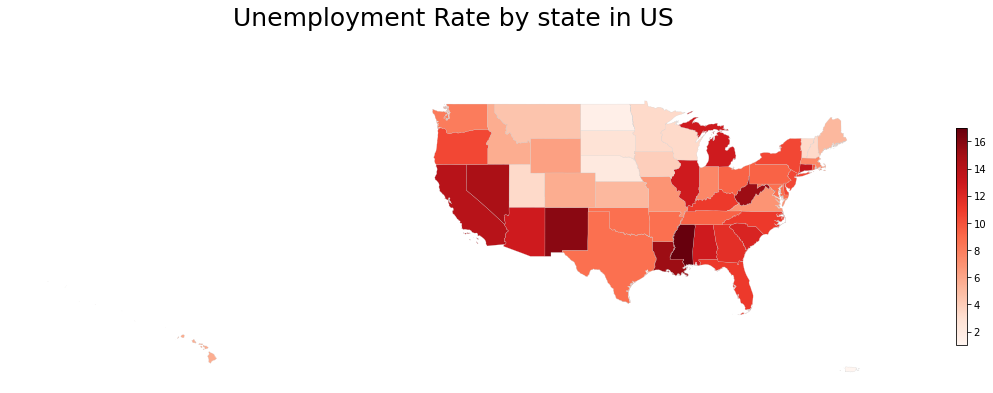

In [130]:
# Function for plotting 

plt.figure(figsize=(10,20))

# set the range for the choropleth
vmin, vmax = 1,17

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 20))

# remove the axis
ax.axis('off')

# add a title and annotatio"
ax.set_title("Unemployment Rate by state in US\n\n", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm, shrink=0.2)

#fig.set_size_inches(18.5, 18.5, forward=True)

# plot the map
uemploy_plot.plot(column= 'Unemployment Rate', cmap='Reds', linewidth=0.2, ax=ax, edgecolor='0.8')

This map shows the unemployment rate within the US within each state. There is a high concentration of unemployment rate within Mississippi, Louisiana, New Mexico, Nevada, California, and West Virginia.  

# 2. Metropolitan and Micropolitan Statistical Areas level data for 2019
## 2.1 Core-Based Statistical Areas Unemployment Rate

In [131]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'

# this comes from the list of variables 
columns = UNEMPLOYRATE 

In [132]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*'
data_url

'http://api.census.gov/data/2019/acs/acs5/profile?get=DP03_0009PE&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*'

In [133]:
#retrieve the data
unemploy_cbsa_response=requests.get(data_url)

These results come in text form. We will transform them into json as an intermidiate step before turning them 
to a data frame.
### Transform API results into DataFrame

In [134]:
#make dataframe:

#1. turn response into json
unemploy_cbsa_data=unemploy_cbsa_response.json()
unemploy_cbsa_data 

# transforminto a DF
df_unemploy_cbsa=pd.DataFrame(unemploy_cbsa_data[1:], columns=unemploy_cbsa_data[0])

df_unemploy_cbsa.head()

DP03_0009PE metropolitan statistical area/micropolitan statistical area
0         9.5                                              13720         
1         3.3                                              13740         
2         6.2                                              13780         
3         5.7                                              13820         
4         2.1                                              13900

### Change column names using a dictionary 

In [135]:
df_unemploy_cbsa = df_unemploy_cbsa.rename(columns = UNEMPLOY_GROUPS)
df_unemploy_cbsa.min()

Unemployment Rate                                                  1.4
metropolitan statistical area/micropolitan statistical area    10100.0
dtype: float64

### Export as csv, Name and save Data Frame as CSV 

In [136]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today +"UnemployByCBSA"
df_unemploy_cbsa.to_csv(home+'.csv', sep=',')

## Plotting
### 2.1.1 Plot unemployment rate by CBSA

(-183.97321945000002, -59.92574754999998, 16.3273193, 50.55845469999999)

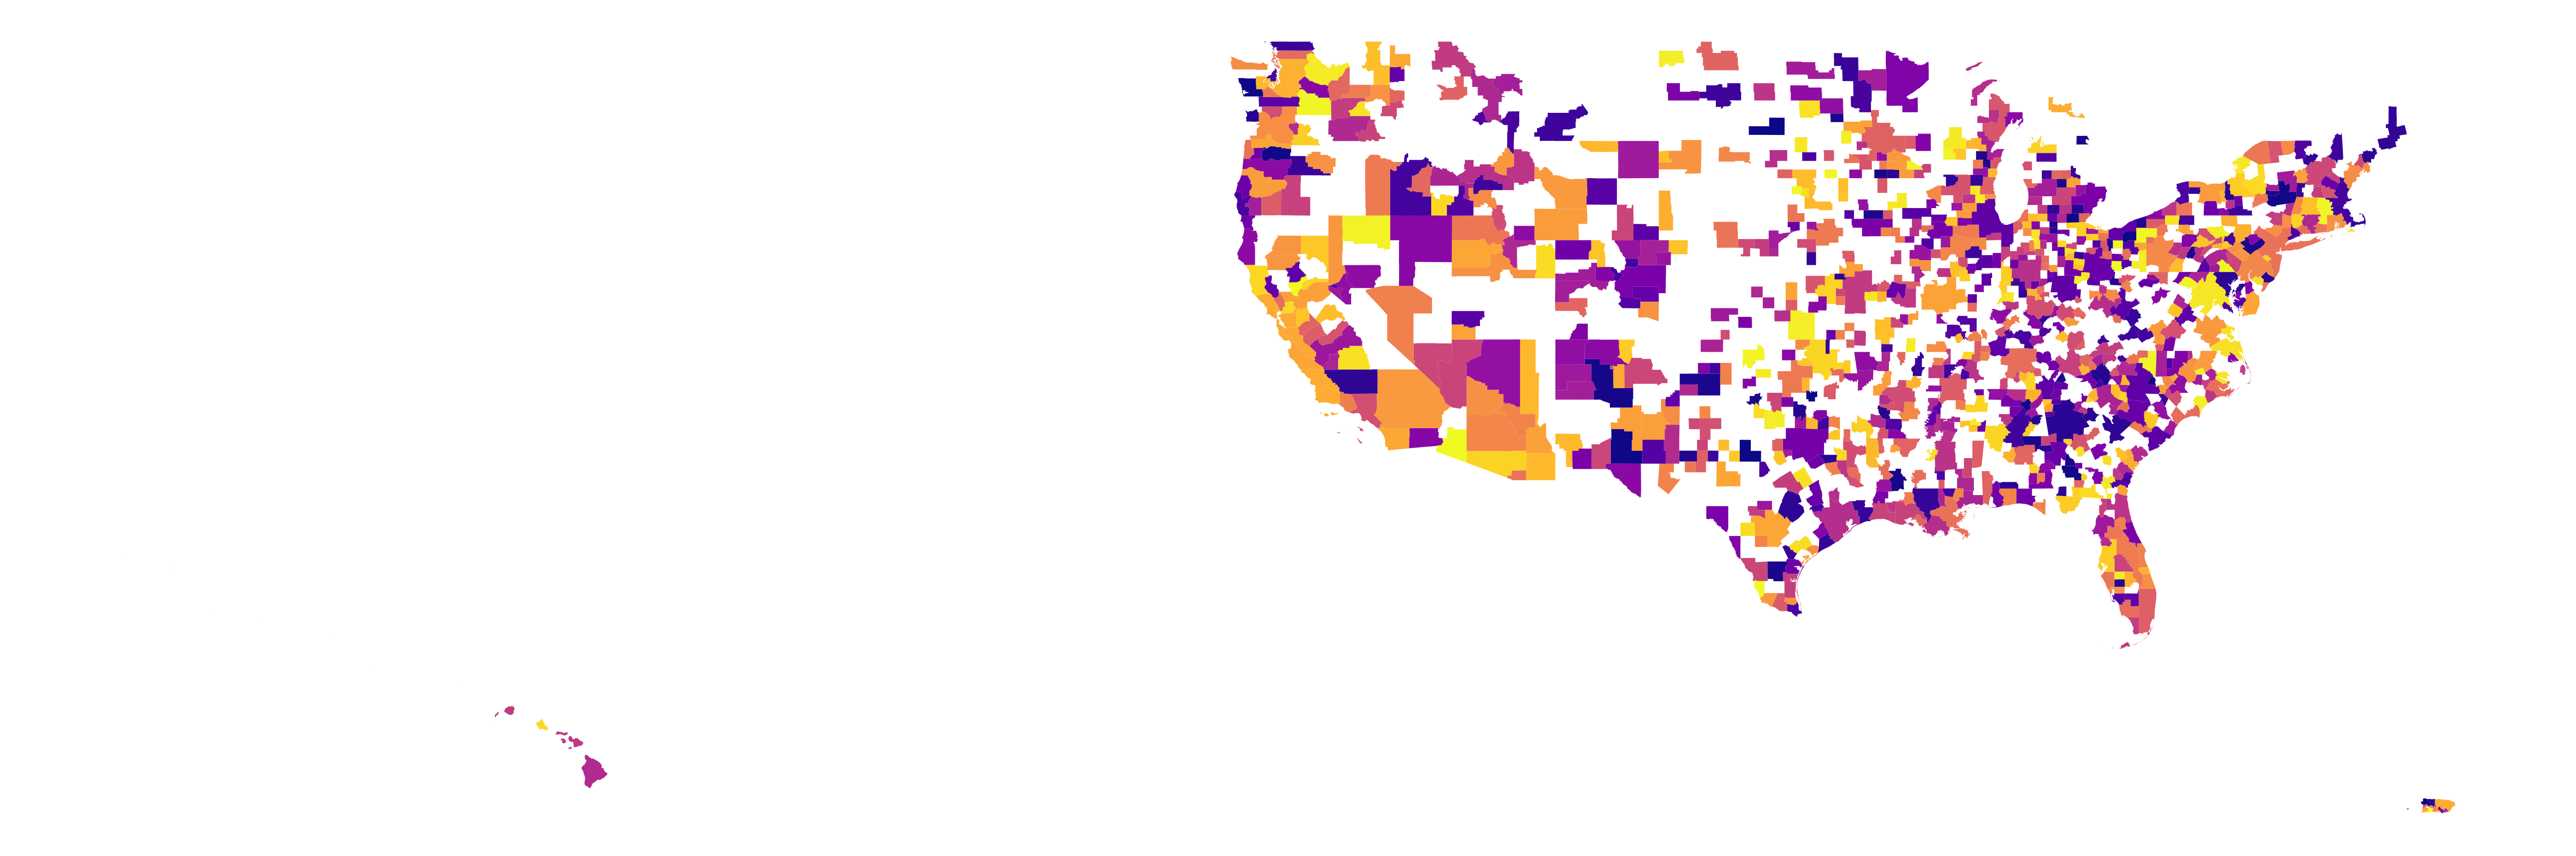

In [137]:
cbsa_old = gpd.read_file('cb_2019_us_cbsa_500k')

# As before, we also drop the Alaska state since it makes the map pretty small (also for consistency)
cbsa = cbsa_old[~cbsa_old['NAME'].str.contains("AK")]
cbsa.plot(column='CBSAFP', cmap ='plasma', figsize=(100,100))
plt.axis('off')

This map shows the general unemployment rsates within Core-Based Statistical Areas (CBSA) throughout the US.

In [138]:
#merge inner all NYC States and the API results
uemploy_cbsa_plot = cbsa.merge(df_unemploy_cbsa, left_on='CBSAFP', right_on='metropolitan statistical area/micropolitan statistical area')

<AxesSubplot:title={'center':'Unemployment Rate by CBSA in US\n\n'}>

<Figure size 720x1440 with 0 Axes>

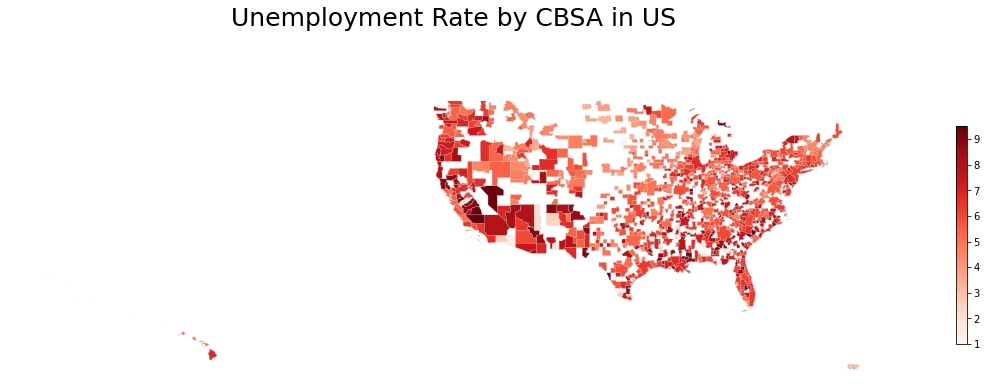

In [139]:
#plotting metropolitan statistical area/micropolitan statistical area
plt.figure(figsize=(10,20))

# set the range for the choropleth
vmin, vmax = 1,9.5

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 20))

# remove the axis
ax.axis('off')

# add a title and annotatio"
ax.set_title("Unemployment Rate by CBSA in US\n\n", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm, shrink=0.2)

#fig.set_size_inches(18.5, 18.5, forward=True)

# plot the map
uemploy_cbsa_plot.plot(column= 'Unemployment Rate', cmap='Reds', linewidth=0.2, ax=ax, edgecolor='0.8')

The map shows the unemployment rates by CBSA (Core-based Statistical Area) within metropolitan regions throughout the US. Based off of the map, we can see that these regions are focused within parts of the West Coast as well as sprinkles of them along the bottom right East Coast.  

# 3 Zip Code (ZCTA) level data in San Francisco for 2019
## 3.1 Percentage of household within given income ranges in San Fransicco 

(-123.64001350000007, -121.2728464999998, 36.795694799998, 38.96285319999783)

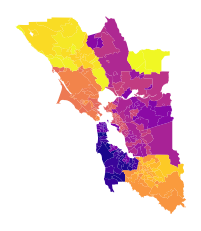

In [140]:
SFZCTA = gpd.read_file('SFZCTA')
SFZCTA.plot(column='zip_code_5', cmap ='plasma')
plt.axis('off')
#SFZCTA

This map is an overview of the San Francisco map by ZCTA.

In [141]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'
# this comes from the list of variables 
columns = INCOME 
state='06'
zip_code = SFZCTA['zip_code_5'].to_list()
zip_code = ', '.join(zip_code)

In [142]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=zip%20code%20tabulation%20area:{zip_code}&in=state:{state}'
#data_url

In [143]:
#retrieve the data
income_SF_response=requests.get(data_url)
#print(income_SF_response.text)

These results come in text form. We will transform them into json as an intermidiate step before turning them 
to a data frame 
### Transform API results into DataFrame

In [144]:
#make dataframe:

#1. turn response into json
income_SF_data=income_SF_response.json()
income_SF_data 

# transforminto a DF

df_income_SF=pd.DataFrame(income_SF_data[1:], columns=income_SF_data[0])

df_income_SF.head()

df_income_SF

DP03_0076PE DP03_0077PE DP03_0078PE DP03_0079PE DP03_0080PE DP03_0081PE  \
0           1.6         1.1         1.0         1.9         2.7         4.1   
1           1.4         0.3         2.6         4.7         6.1         9.2   
2           1.6         1.1         2.1         3.7         5.5         8.5   
3           1.8         0.0         0.0         0.8         1.0        14.9   
4           2.9         1.3         5.2         4.7         7.4        10.8   
..          ...         ...         ...         ...         ...         ...   
259         1.8         0.7         3.5         2.8         3.2         7.1   
260         1.2         1.1         1.8         2.4         2.8         6.1   
261         0.0         0.0         2.3         5.1         2.9         5.4   
262         3.6         1.6        10.0         7.7        13.0        18.6   
263         0.0         0.0         0.0         6.1         0.0        32.7   

    DP03_0082PE DP03_0083PE DP03_0084PE DP03_0085PE state  \
0           4.0        15.7        15.3        52.6    06   
1          13.2        22.7        17.1        22.8    06   
2           7.9        18.1        16.6        34.8    06   
3          19.3        12.7        14.7        34.9    06   
4           7.3        15.1        10.3        35.0    06   
..          ...         ...         ...         ...   ...   
259         4.4        22.2        18.3        36.1    06   
260         5.8        12.7        12.4        53.7    06   
261         7.8        16.7        14.6        45.1    06   
262        13.0        18.5         6.7         7.3    06   
263         0.0        20.4        34.7         6.1    06   

    zip code tabulation area  
0                      94065  
1                      94066  
2                      94086  
3                      94304  
4                      94110  
..                       ...  
259                    95054  
260                    95070  
261                    95113  
262                    95116  
263                    95450  

[264 rows x 12 columns]

### Change column names using a dictionary 

In [145]:
df_income_SF = df_income_SF.rename(columns = INCOME_GROUPS)
df_income_SF

PercentUnder$10,000 Percent$10,000to$14,999 Percent$15,000to$24,999  \
0                   1.6                     1.1                     1.0   
1                   1.4                     0.3                     2.6   
2                   1.6                     1.1                     2.1   
3                   1.8                     0.0                     0.0   
4                   2.9                     1.3                     5.2   
..                  ...                     ...                     ...   
259                 1.8                     0.7                     3.5   
260                 1.2                     1.1                     1.8   
261                 0.0                     0.0                     2.3   
262                 3.6                     1.6                    10.0   
263                 0.0                     0.0                     0.0   

    Percent$25,000to$34,999 Percent$35,000to$49,999 Percent$50,000to$74,999  \
0                       1.9                     2.7                     4.1   
1                       4.7                     6.1                     9.2   
2                       3.7                     5.5                     8.5   
3                       0.8                     1.0                    14.9   
4                       4.7                     7.4                    10.8   
..                      ...                     ...                     ...   
259                     2.8                     3.2                     7.1   
260                     2.4                     2.8                     6.1   
261                     5.1                     2.9                     5.4   
262                     7.7                    13.0                    18.6   
263                     6.1                     0.0                    32.7   

    Percent$75,000to$99,999 Percent$100,000to$149,999  \
0                       4.0                      15.7   
1                      13.2                      22.7   
2                       7.9                      18.1   
3                      19.3                      12.7   
4                       7.3                      15.1   
..                      ...                       ...   
259                     4.4                      22.2   
260                     5.8                      12.7   
261                     7.8                      16.7   
262                    13.0                      18.5   
263                     0.0                      20.4   

    Percent$150,000to$199,999 Percent$200,000ormore state  \
0                        15.3                  52.6    06   
1                        17.1                  22.8    06   
2                        16.6                  34.8    06   
3                        14.7                  34.9    06   
4                        10.3                  35.0    06   
..                        ...                   ...   ...   
259                      18.3                  36.1    06   
260                      12.4                  53.7    06   
261                      14.6                  45.1    06   
262                       6.7                   7.3    06   
263                      34.7                   6.1    06   

    zip code tabulation area  
0                      94065  
1                      94066  
2                      94086  
3                      94304  
4                      94110  
..                       ...  
259                    95054  
260                    95070  
261                    95113  
262                    95116  
263                    95450  

[264 rows x 12 columns]

### Export as csv, Name and save Data Frame as CSV 

In [146]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today + "SF_IncomeByZCTA"
df_income_SF.to_csv(home+'.csv', sep=',')

## Plotting
### 3.1.1 Plot household income distribution of SF

In [147]:
#merge inner all NYC States and the API results
income_SF_plot = SFZCTA.merge(df_income_SF, left_on='zip_code_5', right_on='zip code tabulation area')

### Function that takes in an income-range column name and plot the graph

In [148]:
# Function for plotting 
def plotSFIncome(column_name):
    plt.figure(figsize=(8,10))

    # set the range for the choropleth
    vmin, vmax = 0,100

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))

    # remove the axis
    ax.axis('off')

    # add a title and annotatio"
    ax.set_title("Percent of Households that have income {col} by zipcode in SF\n\n".format(col = column_name[7:]), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm.set_array([])

    # add the colorbar to the figure
    fig.colorbar(sm, shrink=0.2 )

    #fig.set_size_inches(18.5, 18.5, forward=True)

    # plot the map
    income_SF_plot.plot(column= column_name, cmap='Purples', linewidth=0.2, ax=ax, edgecolor='0.8')

### 3.1.2 Plot of household income over $200,000

<Figure size 576x720 with 0 Axes>

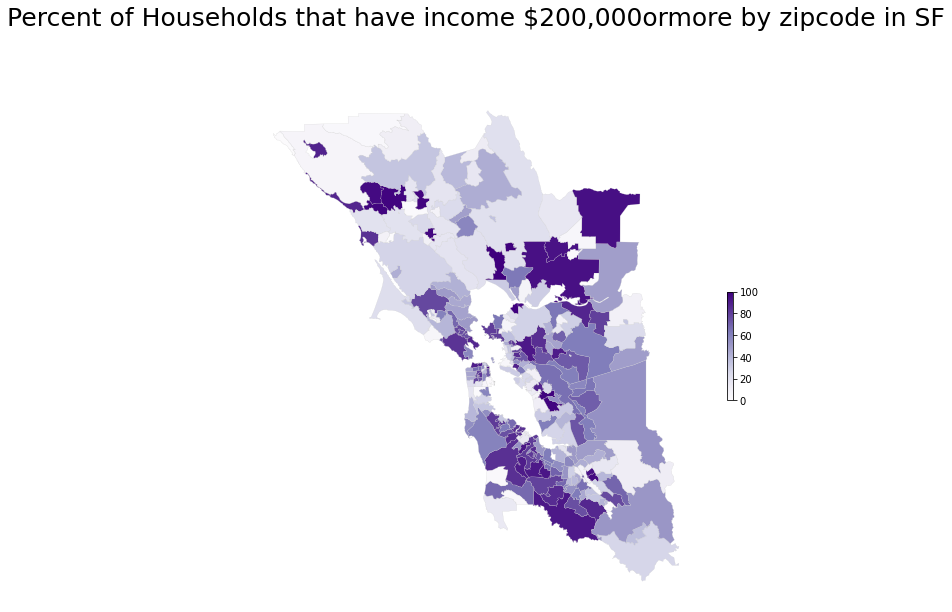

In [149]:
plotSFIncome('Percent$200,000ormore')

The maps above and below shows the  percentage of households that are within a given income range through Zip Code (ZTCA) in San Francisco.

The map shows the percentage of households that have an income of $200,000 or greater through Zip Codes in San Francisco. We can see that there is a higher percentage of households that have an income that is 20,000 or higher casttered across different zip codes within San Francisco, more of them are in the lower west coast and some are in the upper east area.  

### 3.1.3 Plot of percantage of household income from \\$150,000 to \\$199,999

<Figure size 576x720 with 0 Axes>

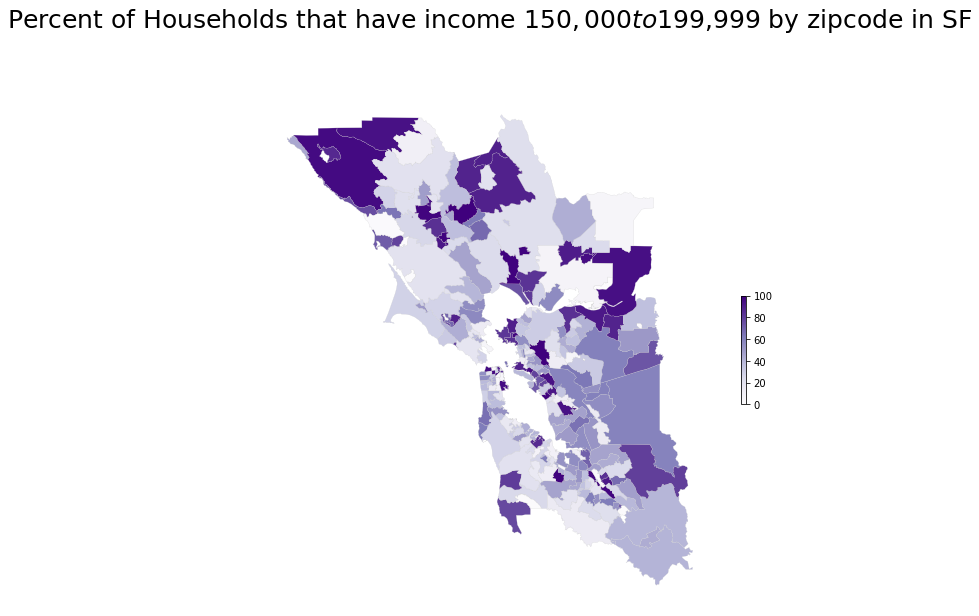

In [150]:
plotSFIncome('Percent$150,000to$199,999')

The map shows the percentage of households that have an income from \\$150,000 to \\$199,999 through Zip Codes in San Francisco. We can see that more of the households whoes income fall within this range are scattered across middle to upper SF. 

### 3.1.4 Plot of percantage of household income from \\$100,000 to \\$149,999

<Figure size 576x720 with 0 Axes>

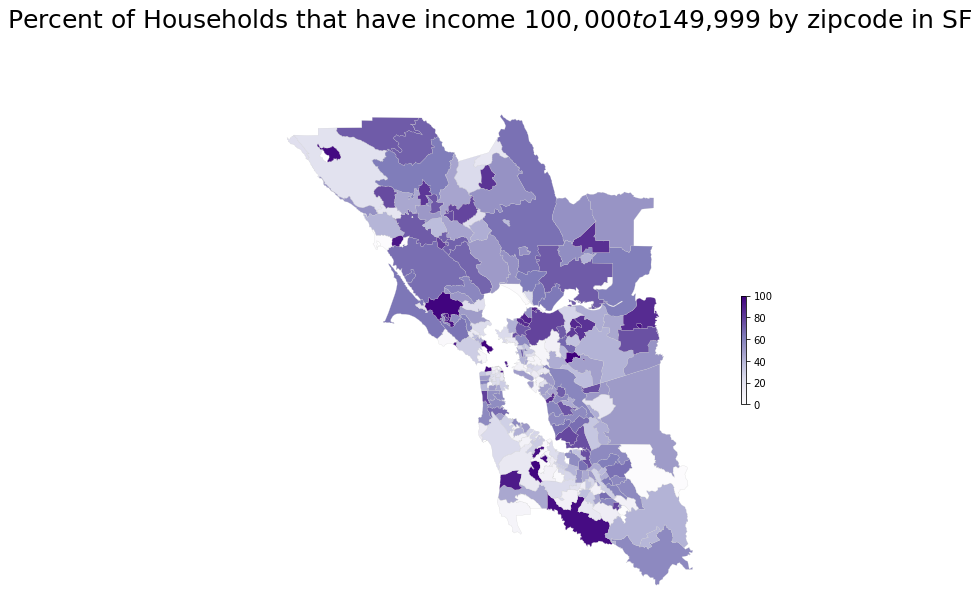

In [151]:
plotSFIncome('Percent$100,000to$149,999')

The map shows the percentage of households that have an income from \\$100,000 to \\$149,999 through Zip Codes in San Francisco. We can see that some of the households whoes income fall within this range are in the lower east coast and scattered across middle to upper SF.  

### 3.1.5 Plot of household income under $10,000

<Figure size 576x720 with 0 Axes>

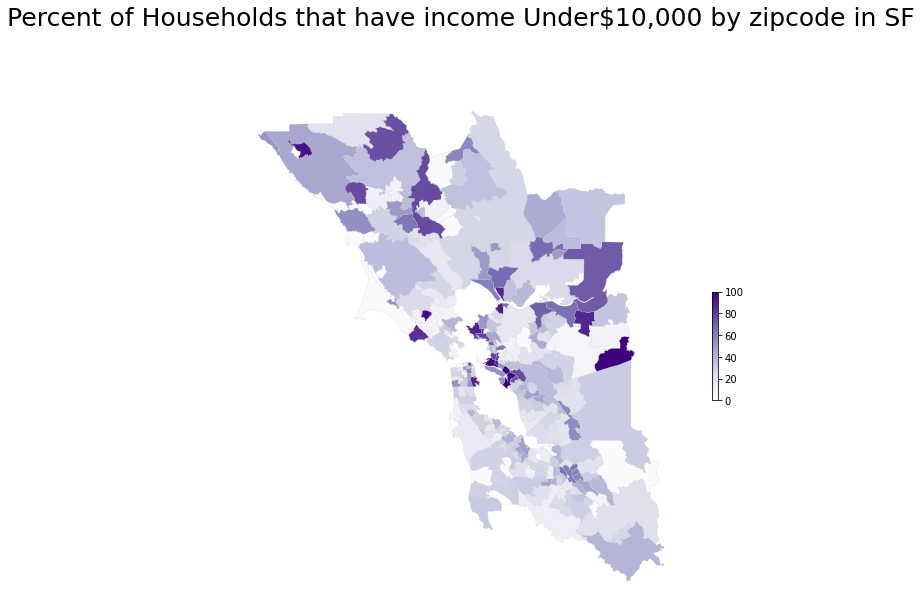

In [152]:
plotSFIncome('PercentUnder$10,000')

This map shows the percentage of households that have the income below $10,000 through Zip Codes in San Francisco. We are able to see which Zip Codes earn an income below 10,000 which are shown to be in some select areas. The percentage is relatively low compared to other income range.

### 3.1.6 Distribution of percentage of household that has a given income in SF

In [153]:
# Plot the percentage in bar graph
df_income_SF_sum = df_income_SF.astype(float)

#remove unwanted/missing value
df_income_SF_sum = df_income_SF_sum[df_income_SF_sum[:] >= 0]

# get the sum and average it by the zipcodes number
df_income_SF_sum = df_income_SF_sum.drop(['state','zip code tabulation area'],axis=1).sum(axis = 0, skipna = True)/len(df_income_SF.index)

#convert to dataframe
df_income_SF_sum = pd.DataFrame(df_income_SF_sum)

df_income_SF_sum.rename(columns={0:'Percentage'})

Percentage
PercentUnder$10,000          2.056818
Percent$10,000to$14,999      1.467424
Percent$15,000to$24,999      3.445455
Percent$25,000to$34,999      4.760985
Percent$35,000to$49,999      6.446212
Percent$50,000to$74,999     11.527652
Percent$75,000to$99,999     10.856061
Percent$100,000to$149,999   18.039773
Percent$150,000to$199,999   13.503409
Percent$200,000ormore       27.138636

Text(0.5, 1.0, 'Average percentage income distribution in SF')

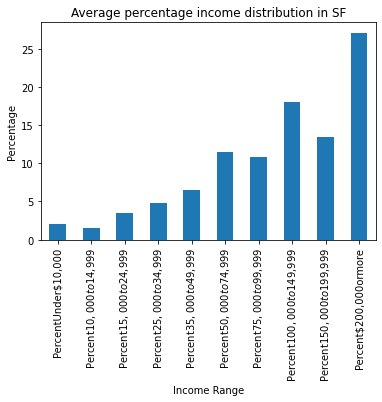

In [154]:
df_income_SF_sum.plot.bar(label = "Income Range", legend=False)
plt.ylabel("Percentage")
plt.xlabel("Income Range")
plt.title("Average percentage income distribution in SF")

This graph shows the percentage of households throughout SF that fall into the given income ranges. As seen above, a large percentage of households within SF fall in the income ranges of \[\\$ 200,000 and more\] and \[\\$ 100,000-\\$ 149,999\].

## 3.2 Median Household Income in SF by zip code

In [155]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'
# this comes from the list of variables 
columns = MEDIANINCOME 
state='06'

In [156]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=zip%20code%20tabulation%20area:{zip_code}&in=state:{state}'
#data_url

In [157]:
#retrieve the data
median_SF_response=requests.get(data_url)
#print(median_SF_response.text)

These results come in text form. We will transform them into json as an intermediate step before turning them 
to a data frame. 
### Transform API results into DataFrame

In [158]:
#make dataframe:

#1. turn response into json
median_SF_data=median_SF_response.json()
median_SF_data 

# transforminto a DF

df_median_SF=pd.DataFrame(median_SF_data[1:], columns=median_SF_data[0])

df_median_SF.head()

DP03_0062E state zip code tabulation area
0     172663    06                    94065
1     109387    06                    94066
2     139847    06                    94086
3     130227    06                    94304
4     134592    06                    94110

### Change column names using a dictionary 

In [159]:
df_median_SF = df_median_SF.rename(columns = MEDIANINCOME_GROUPS)

### Export as csv, Name and save Data Frame as CSV 

In [160]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today +"SF_MedianIncomeByZCTA" 
df_median_SF.to_csv(home+'.csv', sep=',')

## Plotting
### 3.2.1 Plot median household income of SF

In [161]:
#merge inner all SF zipcodes and the API results
median_SF_plot = SFZCTA.merge(df_median_SF, left_on='zip_code_5', right_on='zip code tabulation area')

<AxesSubplot:title={'center':'Median Household Income by zipcode in San Francisco\n\n'}>

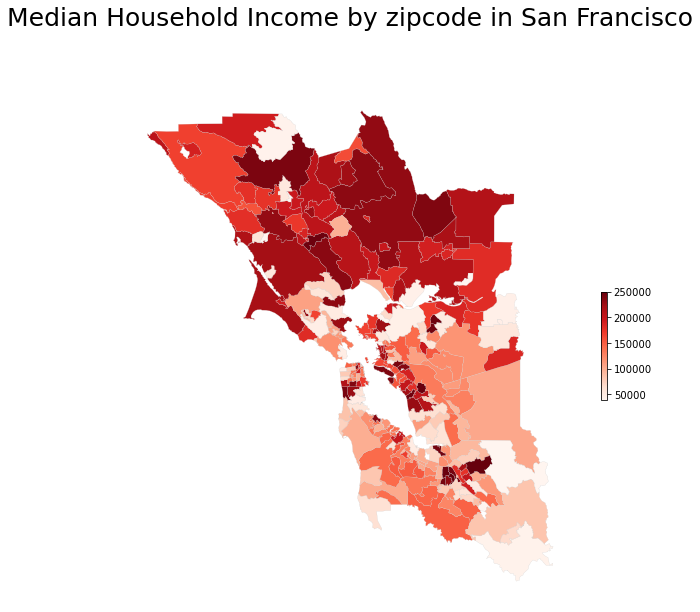

In [162]:
# set the range for the choropleth
vmin, vmax = 38125, 250001

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# remove the axis
ax.axis('off')

# add a title and annotatio"
ax.set_title("Median Household Income by zipcode in San Francisco\n\n", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm, shrink=0.2)

#fig.set_size_inches(18.5, 18.5, forward=True)

# plot the map
median_SF_plot.plot(column= 'Median household income', cmap='Reds', linewidth=0.2, ax=ax, edgecolor='0.8')

This map depicts the median household income within San Francisco through Zip Codes. As seen, the zip codes within the upper region of San Francisco has a higher median household income in comparison to the lower zip codes within this city. However, there are some minor exceptions along the middle regions of the city. 

Also we can see that, zipcodes that has a higher percentage of households with high income (more than \\$100,000 per year) are more likely to have high median household income as well.  

## 3.3  Occupied units paying gross rent in SF

In [163]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'
# this comes from the list of variables 
columns = PAIDGROSSRENT
state='06'

In [164]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=zip%20code%20tabulation%20area:{zip_code}&in=state:{state}'
#data_url

In [165]:
#retrieve the data
rent_SF_response=requests.get(data_url)

These results come in text form. We will transform them into json as an intermediate step before turning them 
to a data frame 
### Transform API results into DataFrame

In [166]:
#make dataframe:

#1. turn response into json
rent_SF_data=rent_SF_response.json()
rent_SF_data 

# transforminto a DF

df_rent_SF=pd.DataFrame(rent_SF_data[1:], columns=rent_SF_data[0])

df_rent_SF.head()

DP04_0127PE DP04_0128PE DP04_0129PE DP04_0130PE DP04_0131PE DP04_0132PE  \
0         0.9         3.7         2.1         0.0         7.5        10.8   
1         1.0         1.7         8.2        21.9        23.3        18.1   
2         2.4         2.6         4.4        15.9        29.0        23.4   
3         0.0         0.0        11.7         4.6         5.8        29.6   
4         7.6        15.8        17.6        14.2        12.1        11.0   

  DP04_0133PE state zip code tabulation area  
0        75.1    06                    94065  
1        26.0    06                    94066  
2        22.3    06                    94086  
3        48.3    06                    94304  
4        21.7    06                    94110

### Change column names using a dictionary 

In [167]:
df_rent_SF = df_rent_SF.rename(columns = GROSSRENT_GROUPS)

#select columns that need to be changed to float from string
all_columns = list(GROSSRENT_GROUPS.values())

#change string to float
df_rent_SF[all_columns]=df_rent_SF[all_columns].astype(float)

#filter to remove rent below than 0 (missing value)
df_rent_SF=df_rent_SF[df_rent_SF["PercentLessThan500"]>=0]
df_rent_SF.head()

PercentLessThan500  Percent500to999  Percent1000to1499  Percent1500to1999  \
0                 0.9              3.7                2.1                0.0   
1                 1.0              1.7                8.2               21.9   
2                 2.4              2.6                4.4               15.9   
3                 0.0              0.0               11.7                4.6   
4                 7.6             15.8               17.6               14.2   

   Percent2000to2499  Percent2500to2999  Percent3000ormore state  \
0                7.5               10.8               75.1    06   
1               23.3               18.1               26.0    06   
2               29.0               23.4               22.3    06   
3                5.8               29.6               48.3    06   
4               12.1               11.0               21.7    06   

  zip code tabulation area  
0                    94065  
1                    94066  
2                    94086  
3                    94304  
4                    94110

### Export as csv, Name and save Data Frame as CSV 

In [168]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today+"SF_GrossRentPayment"
df_rent_SF.to_csv(home+'.csv', sep=',')

## Plotting
### 3.2.1 Plot Paid Gross Rent distribution of SF

In [169]:
#merge inner all SF zipcodes and the API results
rent_SF_plot = SFZCTA.merge(df_rent_SF, left_on='zip_code_5', right_on='zip code tabulation area')

### Function that takes in an rent-range column name and plot the graph

In [170]:
# Function for plotting 
def plotSFRent(column_name):
    plt.figure(figsize=(10,20))

    # set the range for the choropleth
    vmin, vmax = 0,100

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))

    # remove the axis
    ax.axis('off')

    # add a title and annotatio"
    ax.set_title("Percent of Occupied units paying rent {col} by zipcode in SF\n\n".format(col = column_name[:]), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm.set_array([])

    # add the colorbar to the figure
    fig.colorbar(sm, shrink=0.2 )

    #fig.set_size_inches(18.5, 18.5, forward=True)

    # plot the map
    rent_SF_plot.plot(column= column_name, cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.8')

### 3.2.2 Plot of gross rent under $500

<Figure size 720x1440 with 0 Axes>

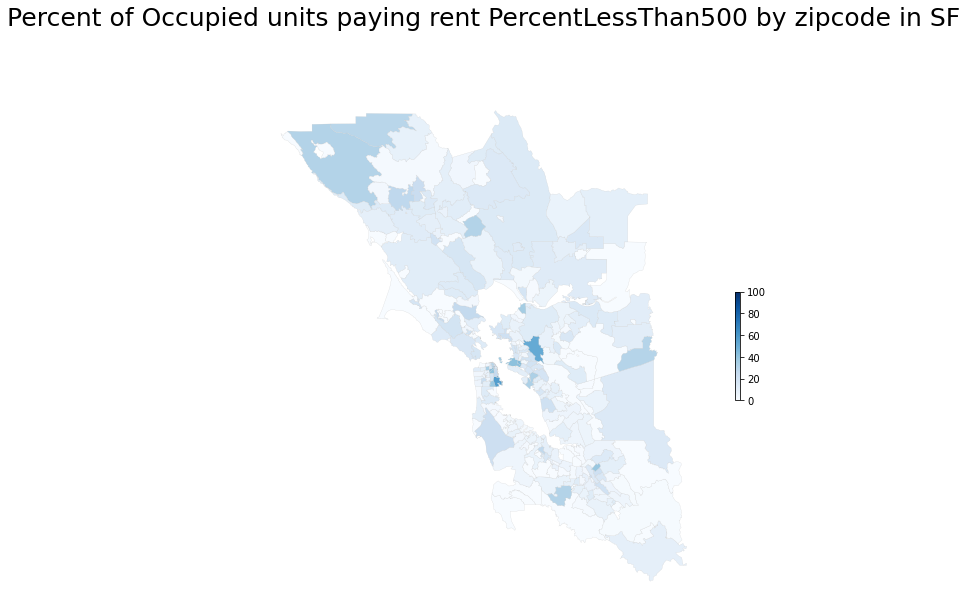

In [171]:
plotSFRent('PercentLessThan500')

This map shows the percentage of occupied units that pay less than $500 for rent through within Zip Codes in San Francisco. As seen from the map, the percentage of occupied units that pay less than 500 is extremely low. 

### 3.2.3 Plot of gross rent in $3000 or more

<Figure size 720x1440 with 0 Axes>

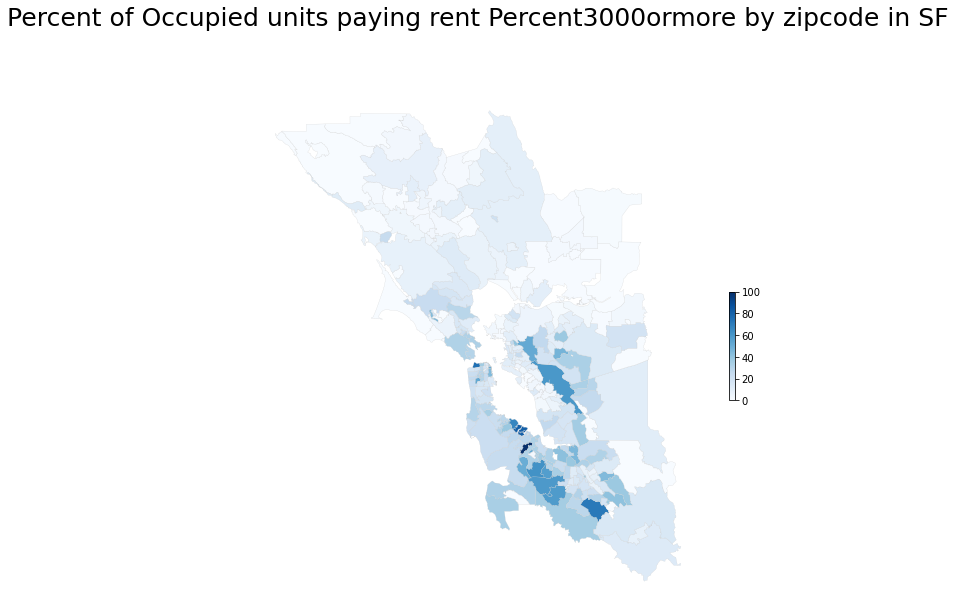

In [172]:
plotSFRent('Percent3000ormore')

The map shows the percentage of occupied units that pay $3,000 or more within Zip Codes in San Francisco. The percentage is still relatively low but compared to the previous map, there are progressively way more Zip Codes that pay 30,000 or more for rent.  

### 3.2.4 Plot of average gross rent in SF

In [173]:
# Plot the percentage in bar graph

df_rent_SF_sum = df_rent_SF.astype(float)

# get the sum and average it by the states number
df_rent_SF_sum = df_rent_SF_sum.drop(['state','zip code tabulation area'],axis=1).sum(axis = 0, skipna = True)/len(df_rent_SF.index)

#convert to dataframe
df_rent_SF_sum = pd.DataFrame(df_rent_SF_sum)

df_rent_SF_sum.rename(columns={0:'Percentage'})

Percentage
PercentLessThan500    4.614231
Percent500to999      10.559615
Percent1000to1499    17.129231
Percent1500to1999    21.182692
Percent2000to2499    17.934231
Percent2500to2999    12.043462
Percent3000ormore    16.539615

Text(0.5, 1.0, 'Average percentage of occupied units paying rent distribution in SF')

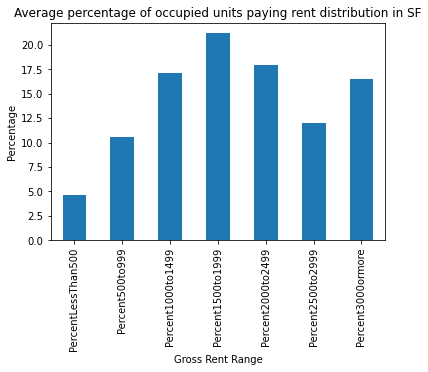

In [174]:
df_rent_SF_sum.plot.bar(label = "Gross Rent Range", legend=False)
plt.ylabel("Percentage")
plt.xlabel("Gross Rent Range")
plt.title("Average percentage of occupied units paying rent distribution in SF")

When looking at this graph, we can see that it shows the average percentage of occupied units within San Francisco that pay rent within a certain gross rent range. The predominantly higher gross rent ranges are [$1,000-$1,499], [$1,500-$1,999], [$2,000-$2499], and [$3,000 or more]. This comes to show that a large portion of people pay within these gross rent ranges within San Francisco.

# 4 Zip Code (ZCTA) level data in New York City for 2019
## 4.1 Percentage of household within given income ranges in NYC

In [175]:
#load ZCTA list by borugh from pickle

with open('BXzip.pkl', 'rb') as f: 
    BXzip = pickle.load(f)
    
with open('BKzip.pkl', 'rb') as f: 
    BKzip = pickle.load(f)

with open('MNzip.pkl', 'rb') as f: 
    MNzip = pickle.load(f)
    
with open('SIzip.pkl', 'rb') as f: 
    SIzip = pickle.load(f)
    
with open('QNzip.pkl', 'rb') as f: 
    QNzip = pickle.load(f)

In [176]:
year='2019' 
data='acs'
data_name='acs5/profile'
columns=INCOME
state='36'
zip_code= BXzip + BKzip + MNzip + SIzip + QNzip 

In [177]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=zip%20code%20tabulation%20area:{zip_code}&in=state:{state}'
#data_url

In [178]:
#retrieve the data
income_NY_response=requests.get(data_url)
# print(income_NY_response.text)
# find way to give feedbak: success/or unsuccessful instead of printing the response

These results come in text form. We will transform them into json as an intermidiate step before turning them 
to a data frame 
### Transform API results into DataFrame

In [179]:
#make dataframe:

#1. turn response into json
income_NY_data=income_NY_response.json()
income_NY_data

# transforminto a DF

df_income_NY=pd.DataFrame(income_NY_data[1:], columns=income_NY_data[0])

df_income_NY.head()

DP03_0076PE DP03_0077PE DP03_0078PE DP03_0079PE DP03_0080PE DP03_0081PE  \
0         3.8         1.6         5.5         4.8         6.4        13.6   
1        15.4         3.6         8.8        10.2        13.4        12.6   
2         2.3         5.1        10.7         7.9         9.3        16.7   
3         2.5         1.9         2.0         2.5         6.9        11.7   
4         2.4         1.4         4.7         4.8         8.1        17.1   

  DP03_0082PE DP03_0083PE DP03_0084PE DP03_0085PE state  \
0        12.9        19.0        11.9        20.7    36   
1        12.0        12.7         5.3         6.0    36   
2        10.0        17.1        10.5        10.4    36   
3        15.0        25.3        16.6        15.6    36   
4        12.4        24.9        12.6        11.5    36   

  zip code tabulation area  
0                    11222  
1                    11233  
2                    11235  
3                    11426  
4                    11427

### Change column names using a dictionary 

In [180]:
df_income_NY = df_income_NY.rename(columns = INCOME_GROUPS)
df_income_NY.head()

PercentUnder$10,000 Percent$10,000to$14,999 Percent$15,000to$24,999  \
0                 3.8                     1.6                     5.5   
1                15.4                     3.6                     8.8   
2                 2.3                     5.1                    10.7   
3                 2.5                     1.9                     2.0   
4                 2.4                     1.4                     4.7   

  Percent$25,000to$34,999 Percent$35,000to$49,999 Percent$50,000to$74,999  \
0                     4.8                     6.4                    13.6   
1                    10.2                    13.4                    12.6   
2                     7.9                     9.3                    16.7   
3                     2.5                     6.9                    11.7   
4                     4.8                     8.1                    17.1   

  Percent$75,000to$99,999 Percent$100,000to$149,999 Percent$150,000to$199,999  \
0                    12.9                      19.0                      11.9   
1                    12.0                      12.7                       5.3   
2                    10.0                      17.1                      10.5   
3                    15.0                      25.3                      16.6   
4                    12.4                      24.9                      12.6   

  Percent$200,000ormore state zip code tabulation area  
0                  20.7    36                    11222  
1                   6.0    36                    11233  
2                  10.4    36                    11235  
3                  15.6    36                    11426  
4                  11.5    36                    11427

### Export as csv, Name and save Data Frame as CSV 

In [181]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today + "NYC_IncomeByZCTA"
df_income_NY.to_csv(home+'.csv', sep=',')

## Plotting
### 4.1.1 Plot household income distribution of NYC

(-74.28613989999997, -73.62075209999998, 40.4749613499998, 40.93624964999982)

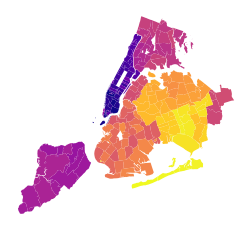

In [182]:
nycZCTA = gpd.read_file('zcta/zctashape')
nycZCTA.plot(column='zcta', cmap ='plasma')
plt.axis('off')

The map above just shows the general Zip Codes map of New York City. 

In [183]:
nycZCTA.head()

zcta  bcode  note                                           geometry
0  10001  36061  None  POLYGON ((-74.00368 40.74835, -74.00653 40.749...
1  10002  36061  None  POLYGON ((-73.99695 40.71207, -73.99712 40.712...
2  10003  36061  None  POLYGON ((-73.99206 40.72564, -73.99179 40.726...
3  10007  36061  None  POLYGON ((-74.01046 40.71153, -74.01015 40.712...
4  10009  36061  None  POLYGON ((-73.97521 40.71924, -73.97512 40.719...

In [184]:
#merge inner all NYC zipcodes and the API results
income_NY_plot = nycZCTA.merge(df_income_NY, left_on='zcta', right_on='zip code tabulation area')

### Function that takes in an income-range column name and plot the graph

In [185]:
# Function for plotting 
def plotNYIncome(column_name):
    plt.figure(figsize=(10,20))

    # set the range for the choropleth
    vmin, vmax = 0,100

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))

    # remove the axis
    ax.axis('off')

    # add a title and annotatio"
    ax.set_title("Percent of Households that have income {col} by zipcode in NY\n\n".format(col = column_name[7:]), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm.set_array([])

    # add the colorbar to the figure
    fig.colorbar(sm, shrink=0.2 )

    #fig.set_size_inches(18.5, 18.5, forward=True)

    # plot the map
    income_NY_plot.plot(column= column_name, cmap='Purples', linewidth=0.2, ax=ax, edgecolor='0.8')

### 4.1.2 Plot of household income under $10,000 

<Figure size 720x1440 with 0 Axes>

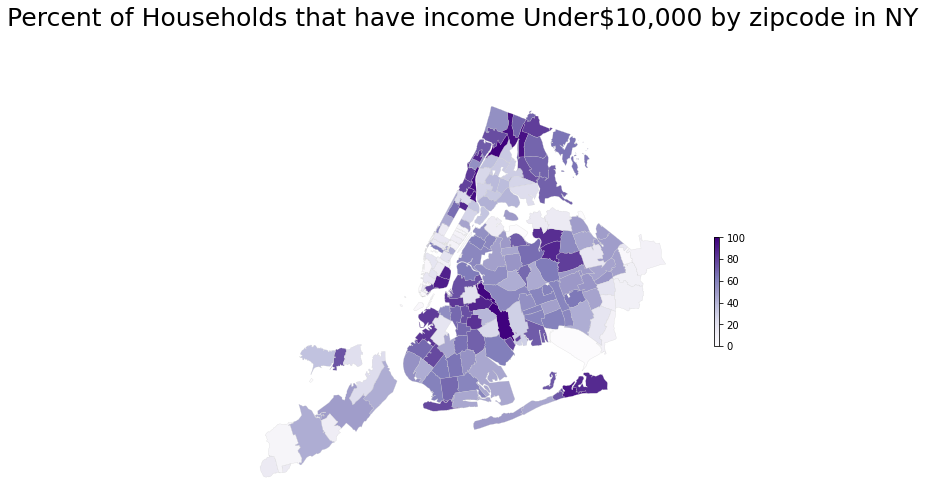

In [186]:
plotNYIncome('PercentUnder$10,000')

This map shows the percentage of households that earn an income below $10,000 through Zip Codes in New York City. The regions with the higher percentages are located within the edge of upper Manhattan, upper Bronx, the edge of Brooklyn (right outside of Queens), and parts of Queens (lower portion and upper region).  

### 4.1.2 Plot of household income in $200,000 or more

<Figure size 720x1440 with 0 Axes>

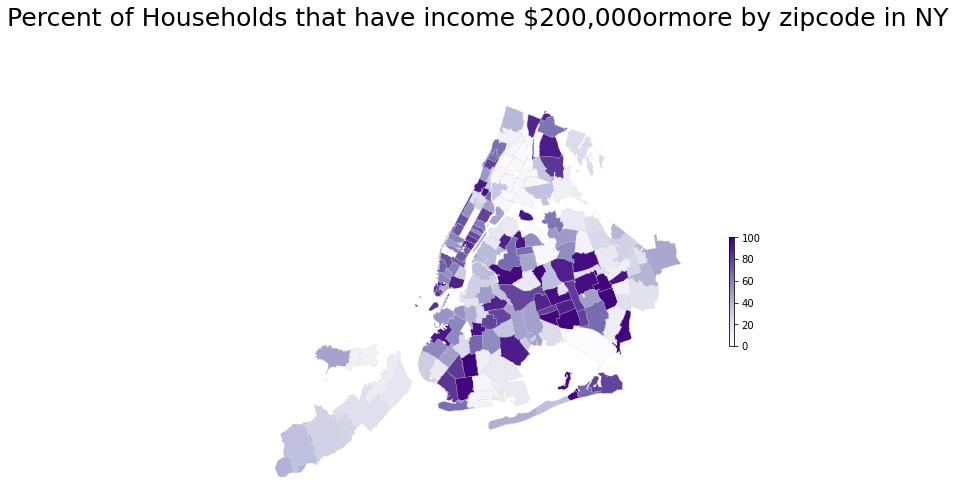

In [187]:
plotNYIncome('Percent$200,000ormore')

The map shows the percentage of households that have an income of $200,000 or greater through Zip Codes within NYC. These regions are concentrated all along Brooklyn, Queens, sections of the Bronx, and very small regions throughout Manhattan. 

### 4.1.3 Distribution of percentage of household that has a given income in NYC

In [188]:
# Plot the percentage in bar graph
df_income_NY_sum = df_income_NY.astype(float)

#remove unwanted/missing value
df_income_NY_sum = df_income_NY_sum[df_income_NY_sum[:] >= 0]

# get the sum and average it by the zipcodes number
df_income_NY_sum = df_income_NY_sum.drop(['state','zip code tabulation area'],axis=1).sum(axis = 0, skipna = True)/len(df_income_NY.index)

#convert to dataframe
df_income_NY_sum = pd.DataFrame(df_income_NY_sum)

df_income_NY_sum.rename(columns={0:'Percentage'})

Percentage
PercentUnder$10,000          4.131553
Percent$10,000to$14,999      2.747573
Percent$15,000to$24,999      6.035437
Percent$25,000to$34,999      6.071845
Percent$35,000to$49,999      8.225728
Percent$50,000to$74,999     11.845631
Percent$75,000to$99,999      9.414563
Percent$100,000to$149,999   13.746602
Percent$150,000to$199,999    8.087379
Percent$200,000ormore       14.654369

Text(0.5, 1.0, 'Average percentage income distribution in NYC')

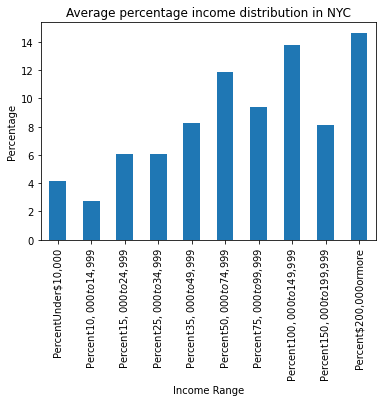

In [189]:
df_income_NY_sum.plot.bar(label = "Income Range", legend=False)
plt.ylabel("Percentage")
plt.xlabel("Income Range")
plt.title("Average percentage income distribution in NYC")

This graph shows the percentage of households throughout NYC that fall into the given income ranges. As seen above, a large percentage of households within NYC fall in the income ranges of \[\\$ 200,000 and more\], \[\\$ 100,000-\\$ 149,999\] and \[\\$ 50,000-\\$ 74,999\]

## 4.2 Median Household Income in NYC by zip code

In [190]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'
columns=MEDIANINCOME 
state='36'
zip_code= BXzip + BKzip + MNzip + SIzip + QNzip 

In [191]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=zip%20code%20tabulation%20area:{zip_code}&in=state:{state}'
#data_url

In [192]:
#retrieve the data
median_NY_response=requests.get(data_url)

These results come in text form. We will transform them into json as an intermidiate step before turning them 
to a data frame 
### Transform API results into DataFrame

In [193]:
#make dataframe:

#1. turn response into json
median_NY_data=median_NY_response.json()
median_NY_data 

# transforminto a DF

df_median_NY=pd.DataFrame(median_NY_data[1:], columns=median_NY_data[0])

df_median_NY.head()

DP03_0062E state zip code tabulation area
0      93488    36                    11222
1      44905    36                    11233
2      54646    36                    11235
3      98987    36                    11426
4      79385    36                    11427

### Change column names using a dictionary 

In [194]:
df_median_NY = df_median_NY.rename(columns = MEDIANINCOME_GROUPS)
#df_median_NY["Median household income"]=pd.to_numeric(df_median_NY['Median household income'])
#df_median_NY = df_median_NY[df_median_NY["Median household income"]>=0]
#df_median_NY.min(), df_median_NY.max()

### Export as csv, Name and save Data Frame as CSV 

In [195]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today + "NYC_MedianIncomeByZCTA"
df_median_NY.to_csv(home+'.csv', sep=',')

## Plotting
### 4.2.1 Plot median household income of NYC

In [196]:
#merge inner all SF zipcodes and the API results
median_NY_plot = nycZCTA.merge(df_median_NY, left_on='zcta', right_on='zip code tabulation area')

<AxesSubplot:title={'center':'Median Household Income by zipcode in New York City\n\n'}>

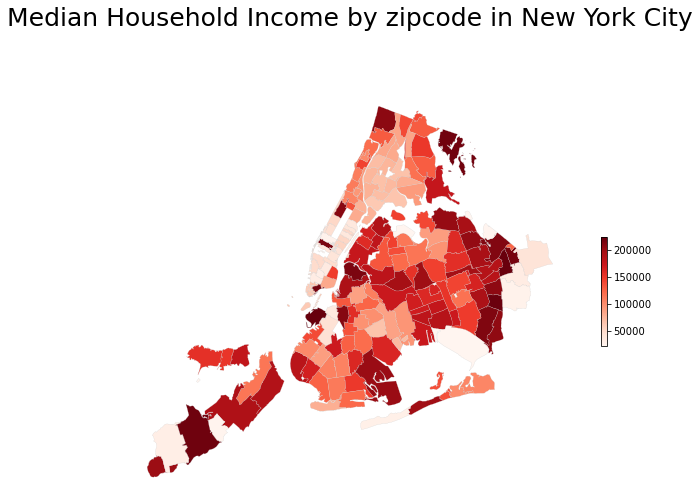

In [197]:

# set the range for the choropleth
vmin, vmax = 21447, 224063

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# remove the axis
ax.axis('off')

# add a title and annotatio"
ax.set_title("Median Household Income by zipcode in New York City\n\n", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm, shrink=0.2)

#fig.set_size_inches(18.5, 18.5, forward=True)

# plot the map
median_NY_plot.plot(column= 'Median household income', cmap='Reds', linewidth=0.2, ax=ax, edgecolor='0.8')

The map shows the median household incomes (range of $50,000 to 200,000) within the different Zip Codes in NYC. As shown, a large portion of this is located at the East edge of Queens, portions of the Bronx (Riverdale, Fieldston, Pelham Bay Park), one specific region within Staten Island (Rossville and Great Kills), and edge of Downtown Brooklyn, and Northern Brooklyn (Greenpoint and Williamsburg).  

Also we can see that zipcode that has greater percentage of high-income household are more likely to have a high median household income as well.

## 4.3  Occupied units paying gross rent in NYC

In [198]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'
# this comes from the list of variables 
columns = PAIDGROSSRENT
state='36'
zip_code= BXzip + BKzip + MNzip + SIzip + QNzip 

In [199]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=zip%20code%20tabulation%20area:{zip_code}&in=state:{state}'
#data_url

In [200]:
#retrieve the data
rent_NY_response=requests.get(data_url)
#print(rent_SF_response.text)

These results come in text form. We will transform them into json as an intermidiate step before turning them 
to a data frame 
### Transform API results into DataFrame

In [201]:
#make dataframe:

#1. turn response into json
rent_NY_data=rent_NY_response.json()
rent_NY_data 

# transforminto a DF

df_rent_NY=pd.DataFrame(rent_NY_data[1:], columns=rent_NY_data[0])

df_rent_NY.head()

DP04_0127PE DP04_0128PE DP04_0129PE DP04_0130PE DP04_0131PE DP04_0132PE  \
0         3.5         9.0        12.4        22.8        21.7        15.0   
1        15.1        21.1        28.8        21.5         8.7         3.5   
2        12.2        15.9        33.3        26.9         7.3         2.4   
3         0.0         6.9        21.1        27.8        26.3        11.7   
4         3.8         7.1        46.8        31.1         7.3         2.3   

  DP04_0133PE state zip code tabulation area  
0        15.6    36                    11222  
1         1.4    36                    11233  
2         2.0    36                    11235  
3         6.3    36                    11426  
4         1.7    36                    11427

### Change column names using a dictionary 

In [202]:
df_rent_NY = df_rent_NY.rename(columns = GROSSRENT_GROUPS)

df_rent_NY

PercentLessThan500 Percent500to999 Percent1000to1499 Percent1500to1999  \
0                  3.5             9.0              12.4              22.8   
1                 15.1            21.1              28.8              21.5   
2                 12.2            15.9              33.3              26.9   
3                  0.0             6.9              21.1              27.8   
4                  3.8             7.1              46.8              31.1   
..                 ...             ...               ...               ...   
201               10.4            13.9              37.0              23.0   
202               17.0            18.3              43.3              17.7   
203               35.7            23.7              23.6              10.6   
204               25.5            24.1              33.3              13.2   
205               11.5            14.4              45.8              23.3   

    Percent2000to2499 Percent2500to2999 Percent3000ormore state  \
0                21.7              15.0              15.6    36   
1                 8.7               3.5               1.4    36   
2                 7.3               2.4               2.0    36   
3                26.3              11.7               6.3    36   
4                 7.3               2.3               1.7    36   
..                ...               ...               ...   ...   
201              10.3               3.0               2.4    36   
202               2.8               0.7               0.1    36   
203               4.4               0.6               1.4    36   
204               3.7               0.2               0.0    36   
205               3.8               0.3               0.9    36   

    zip code tabulation area  
0                      11222  
1                      11233  
2                      11235  
3                      11426  
4                      11427  
..                       ...  
201                    10463  
202                    10453  
203                    10454  
204                    10455  
205                    10458  

[206 rows x 9 columns]

### Export as csv, Name and save Data Frame as CSV 

In [203]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%m%d%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today + "NYC_GrossRentPayment"
df_rent_NY.to_csv(home+'.csv', sep=',')

## Plotting
### 4.2.1 Plot Paid Gross Rent distribution of NYC

In [204]:
#merge inner all SF zipcodes and the API results
rent_NY_plot = nycZCTA.merge(df_rent_NY, left_on='zcta', right_on='zip code tabulation area')
rent_NY_plot.head()

zcta  bcode  note                                           geometry  \
0  10002  36061  None  POLYGON ((-73.99695 40.71207, -73.99712 40.712...   
1  10003  36061  None  POLYGON ((-73.99206 40.72564, -73.99179 40.726...   
2  10007  36061  None  POLYGON ((-74.01046 40.71153, -74.01015 40.712...   
3  10009  36061  None  POLYGON ((-73.97521 40.71924, -73.97512 40.719...   
4  10036  36061  None  POLYGON ((-73.99819 40.76492, -73.99774 40.765...   

  PercentLessThan500 Percent500to999 Percent1000to1499 Percent1500to1999  \
0               25.8            25.6              21.0               9.2   
1                4.0            11.9              13.5               9.7   
2                3.2            19.2               2.6               3.6   
3               15.3            14.8              13.7              14.0   
4                6.0            19.5              10.6              10.2   

  Percent2000to2499 Percent2500to2999 Percent3000ormore state  \
0               6.6               5.6               6.2    36   
1              16.5              18.5              25.9    36   
2               0.0               2.4              69.0    36   
3              12.7               7.9              21.6    36   
4              11.0              12.7              29.9    36   

  zip code tabulation area  
0                    10002  
1                    10003  
2                    10007  
3                    10009  
4                    10036

### Function that takes in an rent-range column name and plot the graph

In [205]:
# Function for plotting 
def plotNYRent(column_name):
    plt.figure(figsize=(10,20))

    # set the range for the choropleth
    vmin, vmax = 0,100

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))

    # remove the axis
    ax.axis('off')

    # add a title and annotatio"
    ax.set_title("Percent of Occupied units paying rent {col} by zipcode in NYC\n\n".format(col = column_name[:]), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm.set_array([])

    # add the colorbar to the figure
    fig.colorbar(sm, shrink=0.2 )

    #fig.set_size_inches(18.5, 18.5, forward=True)

    # plot the map
    rent_NY_plot.plot(column = column_name, cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.8')

### 4.2.2 Plot of gross rent under $500

<Figure size 720x1440 with 0 Axes>

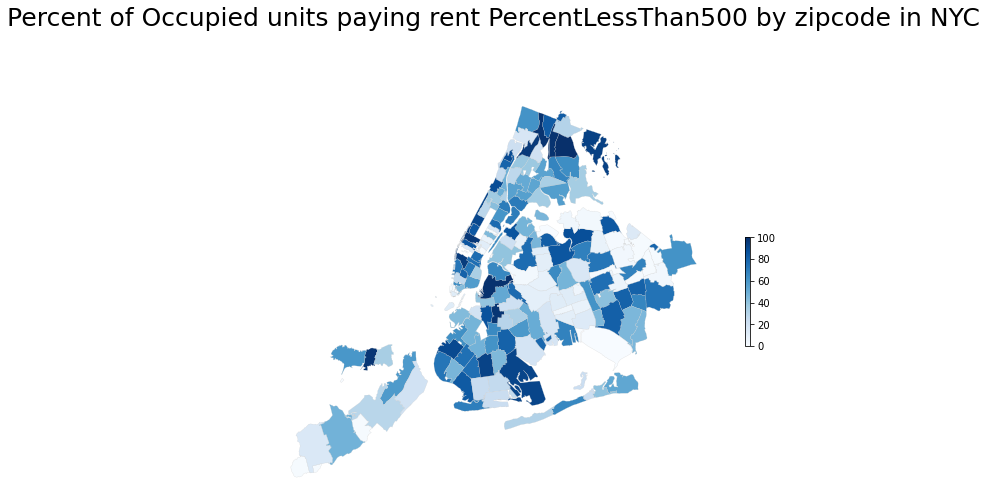

In [206]:
plotNYRent('PercentLessThan500')

The map shows the percent of occupied units that pay less than $500 for rent within the different Zip Codes in NYC. The regions that have the higher percentage are within parts of the Bronx and Brooklyn and small sectors within Manhattan and Staten Island. 

### 4.2.3 Plot of gross rent in $3000 or more

<Figure size 720x1440 with 0 Axes>

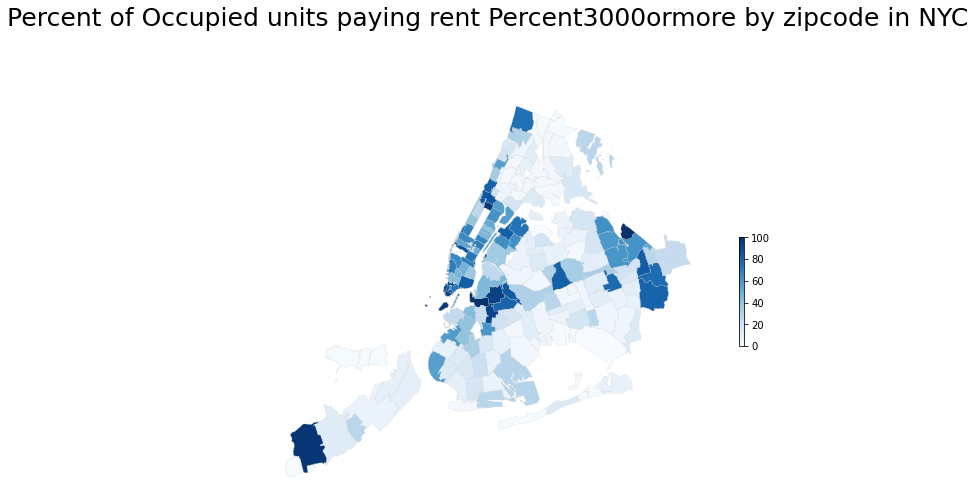

In [207]:
plotNYRent('Percent3000ormore')

This map shows the percent of occupied units paying $3,000 or more within the Zip Codes in NYC. The boroughs that these Zip Codes are present in are lower Staten Island, northern Brooklyn, upper Manhattan, and northeastern region of Queens. 

### 4.2.4 Plot of average gross rent in NYC


In [208]:
# Plot the percentage in bar graph

#convert string to float for calculation
df_rent_NY_sum = df_rent_NY.astype(float)

#remove unwanted/missing value
df_rent_NY_sum = df_rent_NY_sum[df_rent_NY_sum['PercentLessThan500'] >= 0]

# get the sum and average it by the zipcodes number
df_rent_NY_sum = df_rent_NY_sum.drop(['state','zip code tabulation area'],axis=1).sum(axis = 0, skipna = True)/len(df_rent_NY.index)

#convert to dataframe
df_rent_NY_sum = pd.DataFrame(df_rent_NY_sum)

df_rent_NY_sum.rename(columns={0:'Percentage'})

Percentage
PercentLessThan500    7.416990
Percent500to999      11.146602
Percent1000to1499    22.553398
Percent1500to1999    20.400971
Percent2000to2499    10.281553
Percent2500to2999     5.251456
Percent3000ormore     8.391748

Text(0.5, 1.0, 'Average percentage of occupied units paying rent distribution in NY')

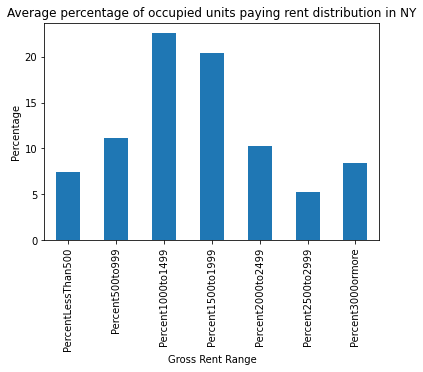

In [209]:
df_rent_NY_sum.plot.bar(label = "Gross Rent Range", legend=False)
plt.ylabel("Percentage")
plt.xlabel("Gross Rent Range")
plt.title("Average percentage of occupied units paying rent distribution in NY")

This graph shows the average percentage of occupied units that pay rent within a certain gross rent range. Based on the graph, we can see that a majority of the percentages are within the two gross rent ranges of [$1,000-$1,499] and [$1,500-$1,999]. 

# 5. Comparison between SF and NYC

## 5.1 Income distribution

In [225]:
compare_income = df_income_NY_sum.join(df_income_SF_sum, lsuffix='percent_NY', rsuffix='percent_SF')

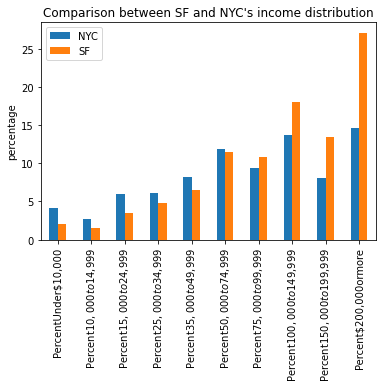

In [226]:
compare_income.plot.bar(title = "Comparison between SF and NYC's income distribution", ylabel='percentage')
plt.legend(["NYC", "SF"]);

Above graph shows the comparison between SF and NYC's income distribution. San Francisco appears to have higher percentage of households that have higher income (100,000 - 200,000 USD) compared to New York City that have higher percentage in low and middle income range (10,000-74,999 USD).

## 5.2 Rent distribution

In [227]:
compare_rent = df_rent_NY_sum.join(df_rent_SF_sum, lsuffix='percent_NY', rsuffix='percent_SF')

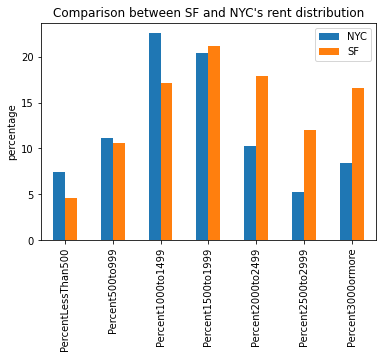

In [228]:
compare_rent.plot.bar(title = "Comparison between SF and NYC's rent distribution", ylabel='percentage')
plt.legend(["NYC", "SF"]);

Above graph shows the comparison between SF and NYC's rent distribution. San Francisco appears to have higher percentage of housing units that have higher rents (2000-3000 USD) compared to New York City that have higher percentage in middle range of rents (1000-1499 USD).

## Role of the team members:
Wisely: All explanations write-up, such as introduction, interpreation of maps and graphs. Discussion in chosing data and how to implement the code. 

Jingjing (Jenny): Discussion in chosing data and implemented the code with Yichen. Formatting of the codes and added supplementary materials.

Yichen (Karena): Discussion in chosing data and implemented the code with Jingjing. Formatting of the codes and made final adjustment for submission.

# End of the notebook